Plotly week 1 challenge

Yusuf Khan 811286910

In [30]:
import pandas as pd
import plotly.express as px
import plotly.io as pio  # To show graphs

# Group 1 Challenge

In [31]:
airbnb_ny_df = pd.read_csv("AB_NYC_2019.csv")
airbnb_ny_df.head(1)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   

   calculated_host_listings_count  availability_365  
0                               6               365

In [32]:
# finding the missing values
missing_values = airbnb_ny_df.isnull().sum()
print("missing values in each column:")
print(missing_values)

missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [33]:
airbnb_ny_cleaned = airbnb_ny_df.dropna(subset=['name','host_name','last_review','reviews_per_month'])  # subset drops only from specified columns while just using the dropna will drop missing values from all the columns so in this case we cas just use dropna
airbnb_ny_cleaned.head(1)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   

   calculated_host_listings_count  availability_365  
0                               6               365

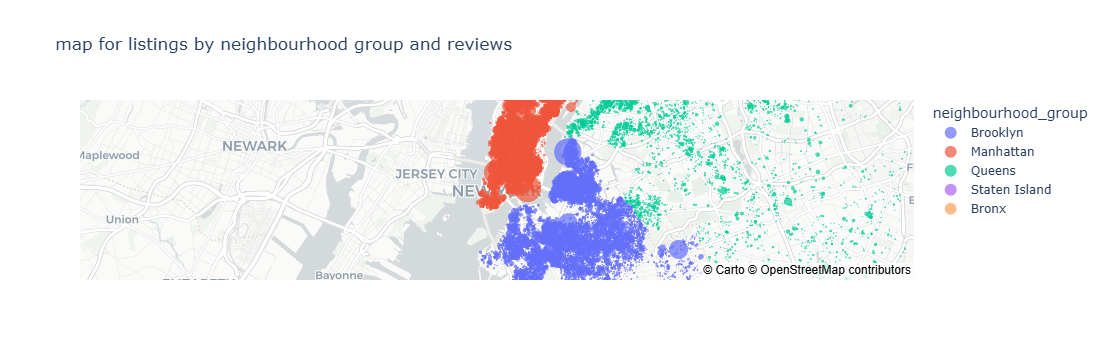

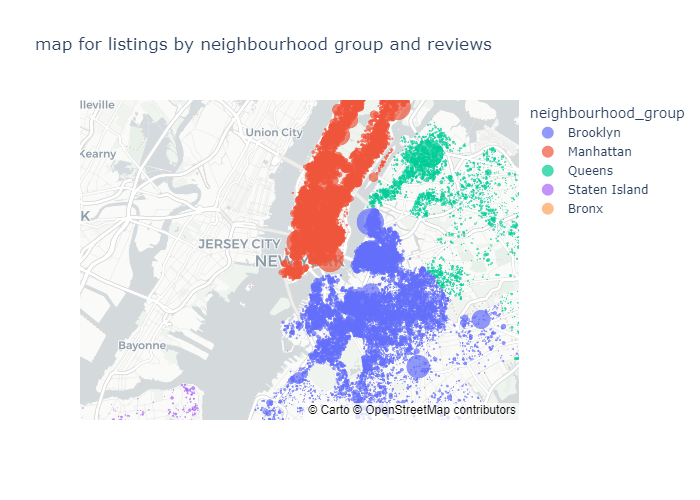

In [34]:
fig = px.scatter_mapbox(airbnb_ny_cleaned, 
                        lat = 'latitude', 
                        lon= 'longitude', 
                        color = 'neighbourhood_group', 
                        size = 'price',
                        title = 'map for listings by neighbourhood group and reviews',
                        mapbox_style = "carto-positron",
                        center = {'lat':40.7128, 'lon':-74.0060},
                        zoom = 10
                       )
fig.show()
pio.show(fig, renderer="png")

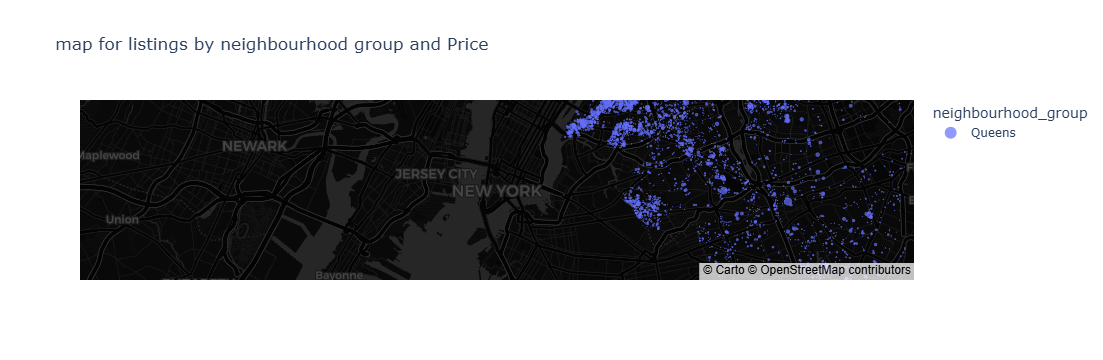

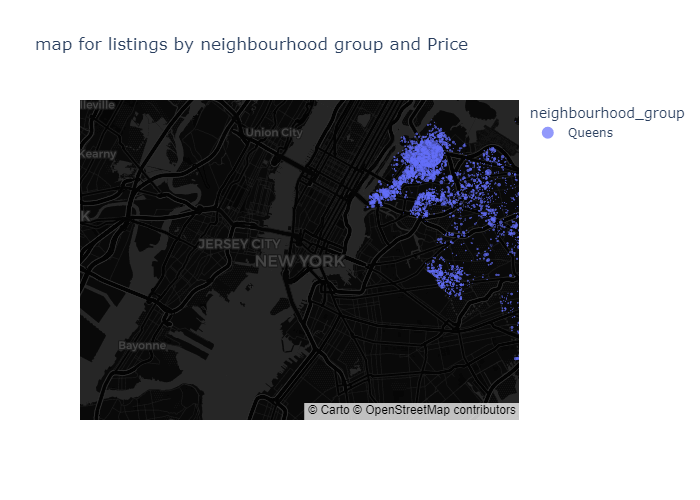

In [35]:
df_queens = airbnb_ny_cleaned[airbnb_ny_cleaned['neighbourhood_group']=='Queens']

fig = px.scatter_mapbox(df_queens, 
                        lat = 'latitude', 
                        lon= 'longitude', 
                        color = 'neighbourhood_group', 
                        size = 'price',
                        title = 'map for listings by neighbourhood group and Price',
                        mapbox_style = "carto-darkmatter",
                        center = {'lat':40.7128, 'lon':-74.0060},
                        zoom = 10
                       )
fig.show()
pio.show(fig, renderer="png")

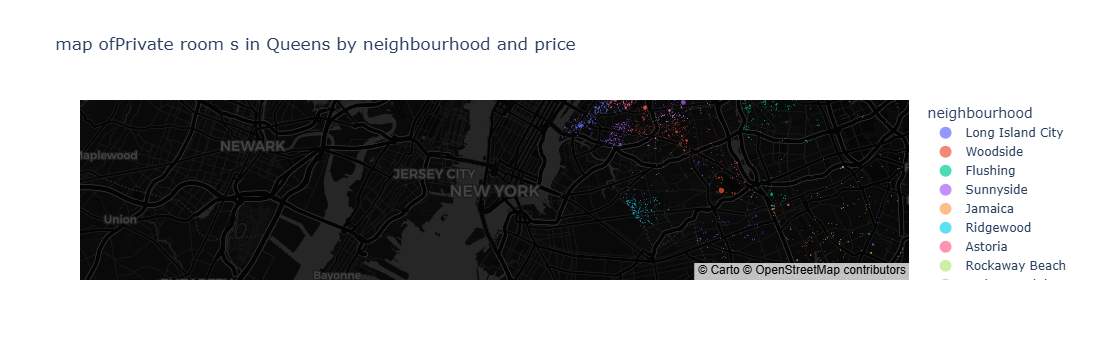

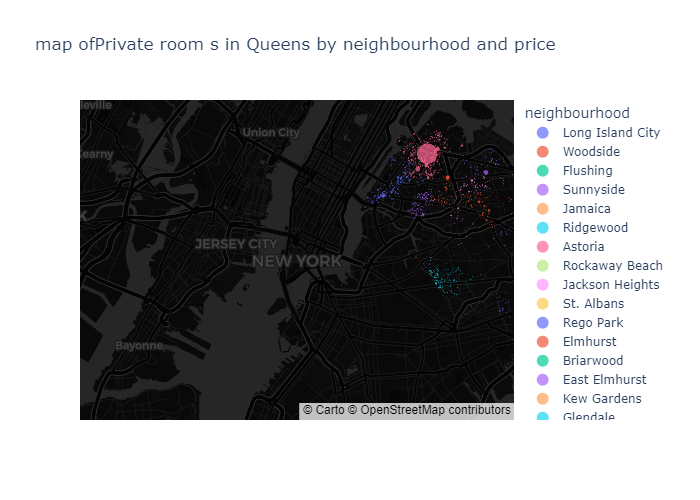

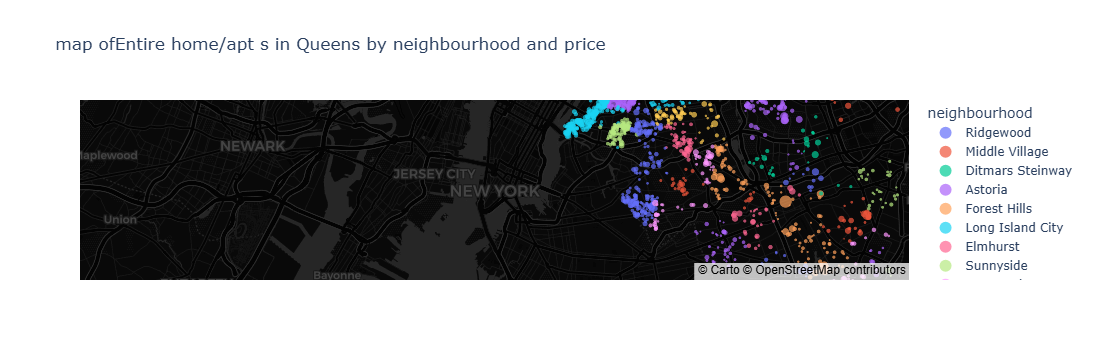

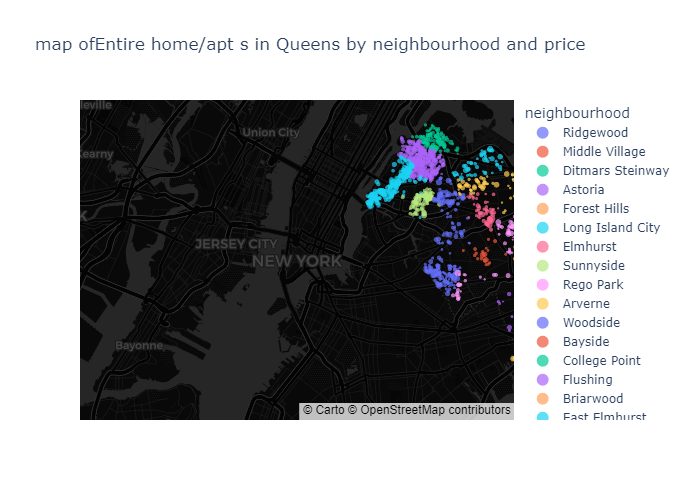

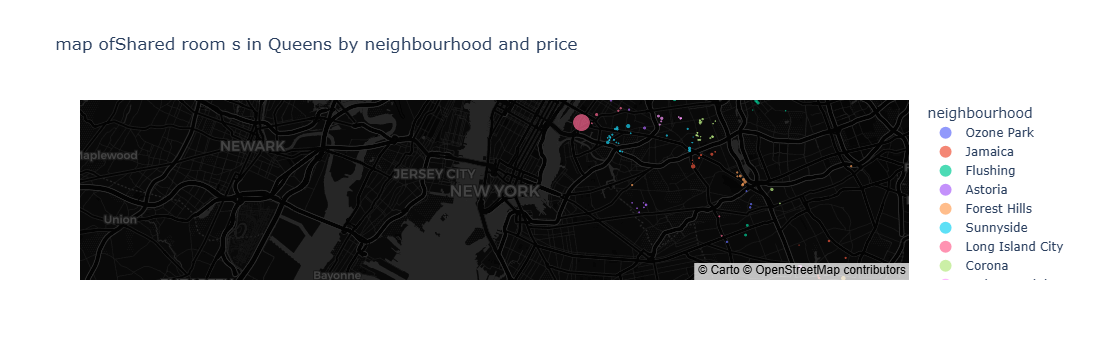

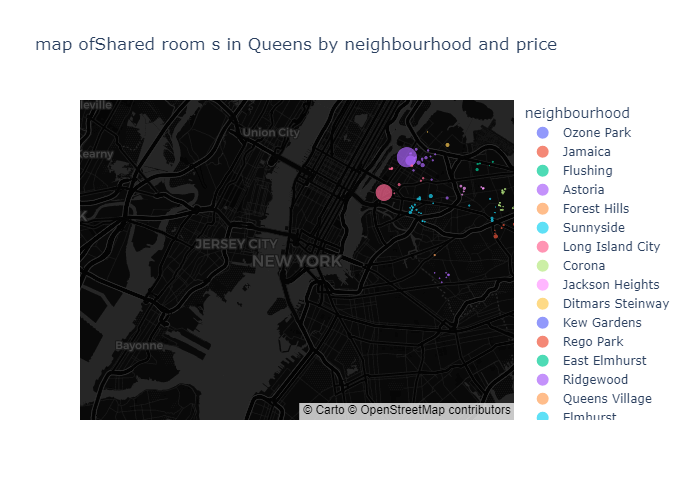

In [36]:
def create_map_for_room_type(room_type):
    df_room_type = df_queens[df_queens['room_type']==room_type]
    
    fig = px.scatter_mapbox(
        df_room_type,
        lat='latitude',
        lon='longitude',
        color = 'neighbourhood',
        size = 'price',
        hover_name = 'name',
        hover_data = {
            'price':True,
            'room_type':True,
            'number_of_reviews':True,
            'availability_365': True
        },
        title = f'map of{room_type} s in Queens by neighbourhood and price',
        mapbox_style = "carto-darkmatter",
        center = {'lat':40.7128, 'lon':-74.0060},
        zoom = 10,
        size_max = 15
    )
    fig.show()
    pio.show(fig, renderer="png")

room_types = df_queens['room_type'].unique()

for room_type in room_types:
    create_map_for_room_type(room_type)



C:\Users\Admin\AppData\Local\Temp\ipykernel_2748\4209579564.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



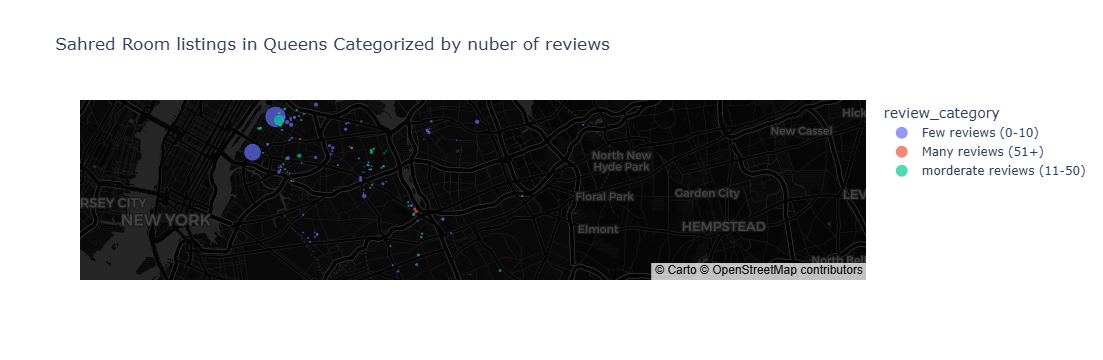

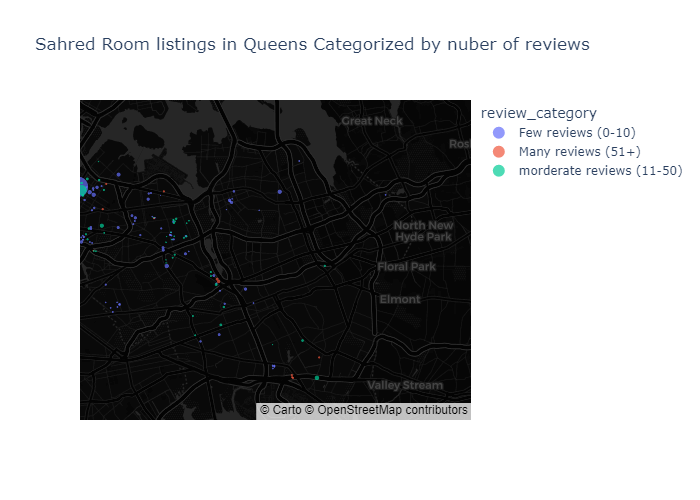

In [37]:
# Filter dataset for Queens and shared rooms
df_shared_rooms = airbnb_ny_cleaned[(airbnb_ny_cleaned['neighbourhood_group'] == 'Queens') & (airbnb_ny_cleaned['room_type'] == 'Shared room')]

# create bins for number of reviews
bins = [0,10,50,float('inf')] # defnie the bin range
labels = ['Few reviews (0-10)', 'morderate reviews (11-50)', 'Many reviews (51+)']   # define lables for the bins
df_shared_rooms['review_category'] = pd.cut(df_shared_rooms['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)

# create the scatter mapbox plot
fig = px.scatter_mapbox(
    df_shared_rooms,
    lat='latitude',
    lon='longitude',
    color='review_category',  #color based on the review category
    size = 'price',  # size by price
    hover_name='name',
    hover_data={
        'price':True,
        'number_of_reviews':True,
        'availability_365':True
    },
    title='Sahred Room listings in Queens Categorized by nuber of reviews',
    mapbox_style="carto-darkmatter",     # use darkmap style
    center={'lat': 40.7282, 'lon': -73.7949},   # centering on Queens
    zoom=10,
    size_max=15
        )
fig.show()
pio.show(fig, renderer="png")

# Group 2 Challenge

In [38]:
sp = pd.read_csv("S&P.csv", header=1) 
sp.head(1)

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   

  Returns on Real Estate  Unnamed: 11  
0                    NaN          NaN

In [39]:
sp = sp.drop(columns = "Unnamed: 11")
sp.head(1)

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   

  Returns on Real Estate  
0                    NaN

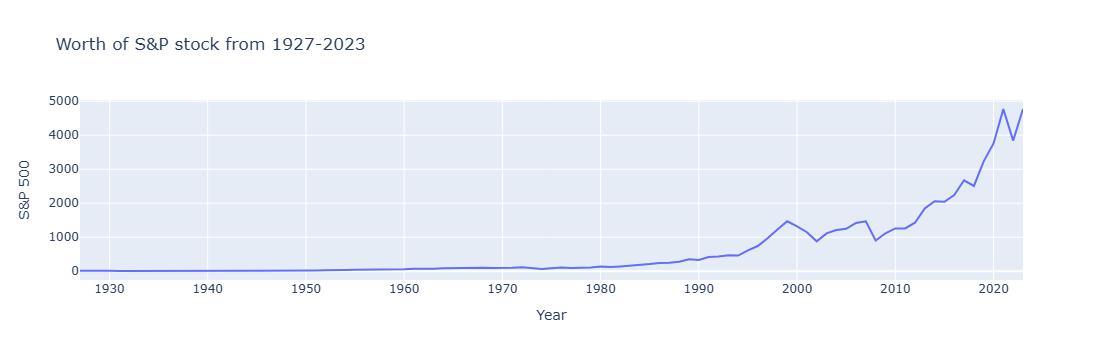

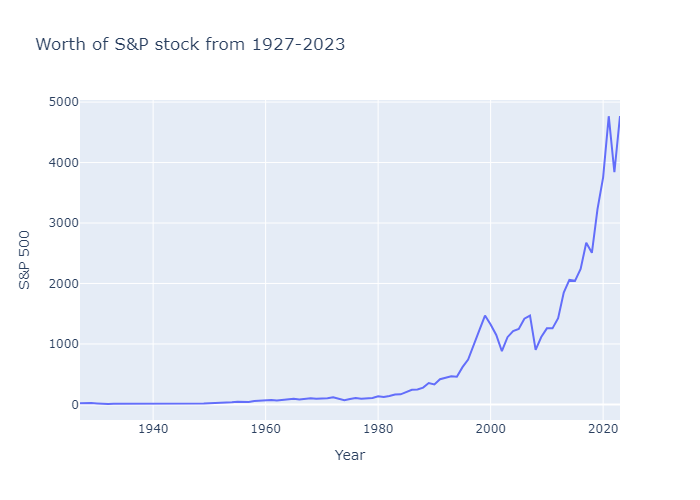

In [40]:
fig = px.line(sp,
              x="Year",
              y="S&P 500",
              title="Worth of S&P stock from 1927-2023")
fig.show()
pio.show(fig, renderer="png")

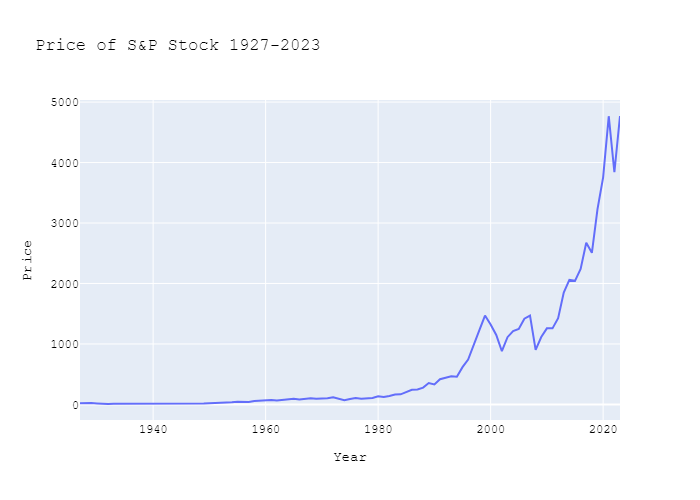

In [41]:
fig.update_layout(
    title="Price of S&P Stock 1927-2023",
    xaxis_title="Year",
    yaxis_title="Price",
    font=dict(
        family="Courier New",
        size=12,
        color="black"
    )
)
pio.show(fig, renderer="png")

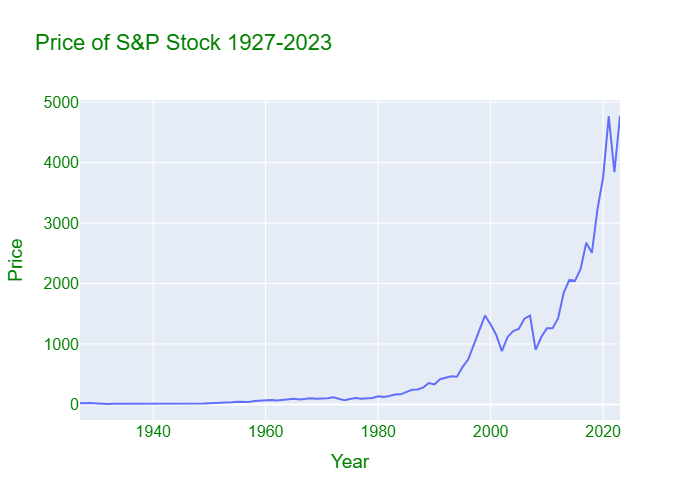

In [42]:
fig.update_layout(
    font=dict(
        family="Arial",
        size=16,
        color="green"
    )
)
pio.show(fig, renderer="png")

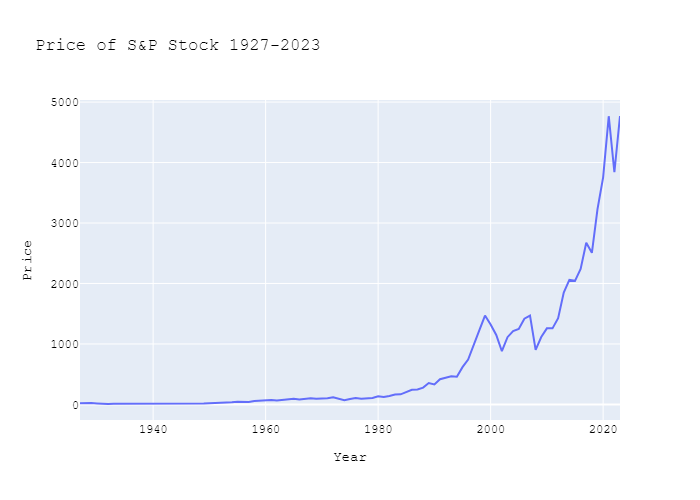

In [43]:
fig.update_layout(
    font=dict(
        family="Courier New",
        size=12,
        color="black"
    )
)
pio.show(fig, renderer="png")

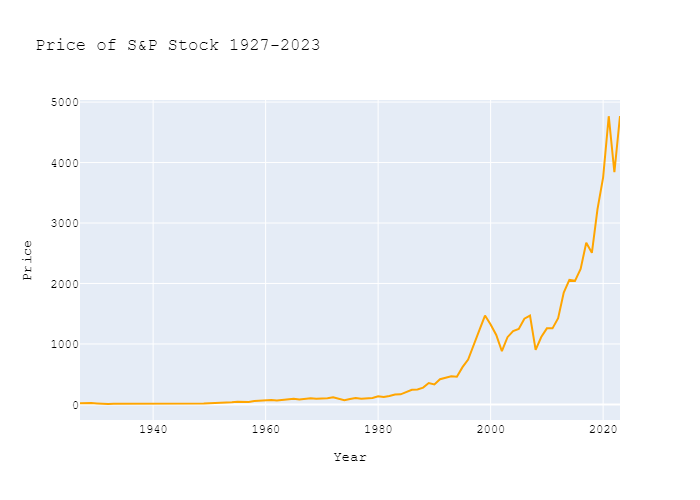

In [44]:
fig.update_traces(line_color="orange",
                  selector=dict(type='scatter') # use of selector 
                 )
pio.show(fig, renderer="png")

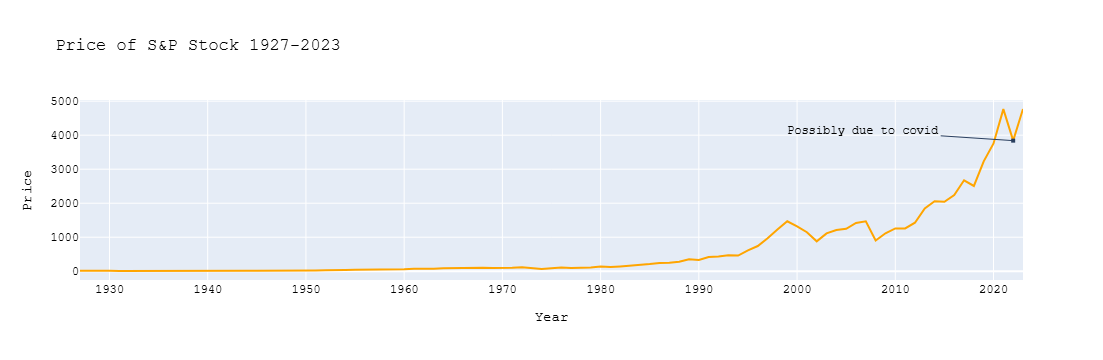

In [45]:
fig.layout.annotations = []  # Clear existing annotations

fig.add_annotation(
    x="2022",
    y=3839.5,
    text="Possibly due to covid",
    showarrow=True,
    arrowhead=7,
    ax=-150,
    ay=-10,
    hovertext="covid 19 was a pandemic lasting from 2020 until 2023 <br> This is me creating a second line",
    hoverlabel=dict(
        bgcolor="white",
        bordercolor="black",
        font=dict(
            color="black"
        )
    )
)

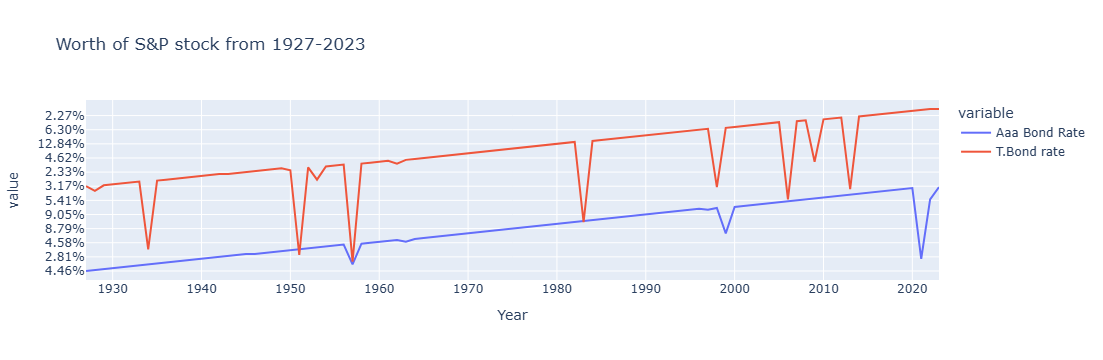

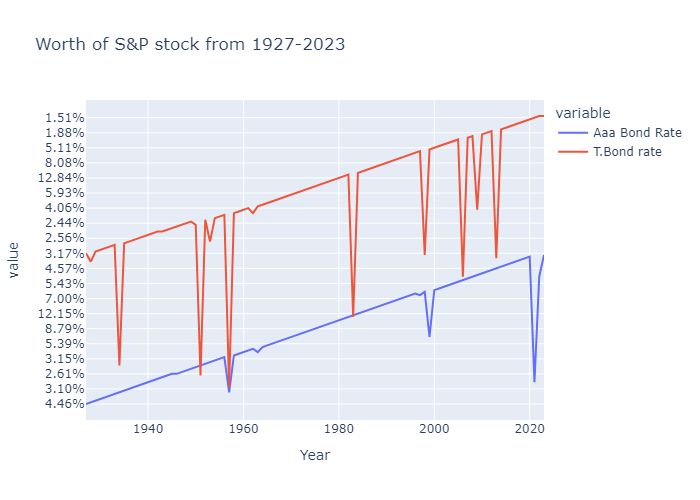

In [46]:
fig = px.line(sp,
              x="Year",
              y=["Aaa Bond Rate", "T.Bond rate"],
              title="Worth of S&P stock from 1927-2023")
fig.show()
pio.show(fig, renderer="png")

In [47]:
fig.data[0].line

scatter.Line({
    'color': '#636efa', 'dash': 'solid'
})

# Group 3 Challenge

In [48]:
data=pd.read_csv("country_wise_latest.csv")
data.head(1)

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                 3.5                  69.49   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean

In [49]:
data.describe() # Summarizing all the numerical values

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

In [50]:
data.isnull().sum()   # Null Values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [51]:
data.drop_duplicates()  # dropping the duplicate values

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

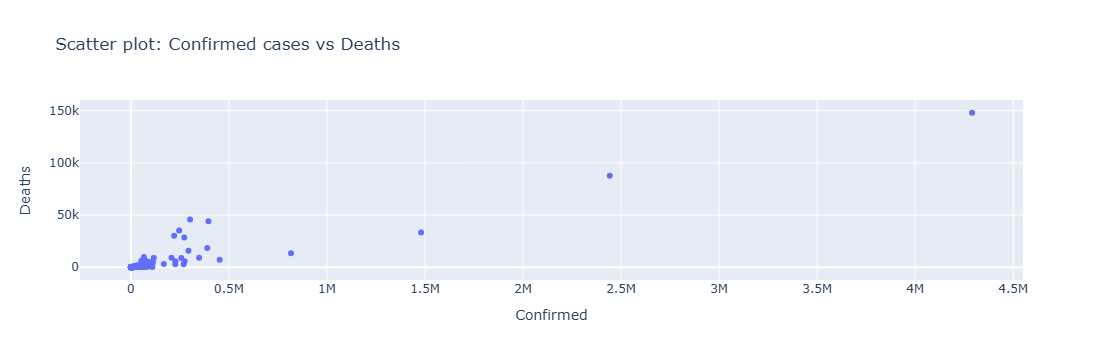

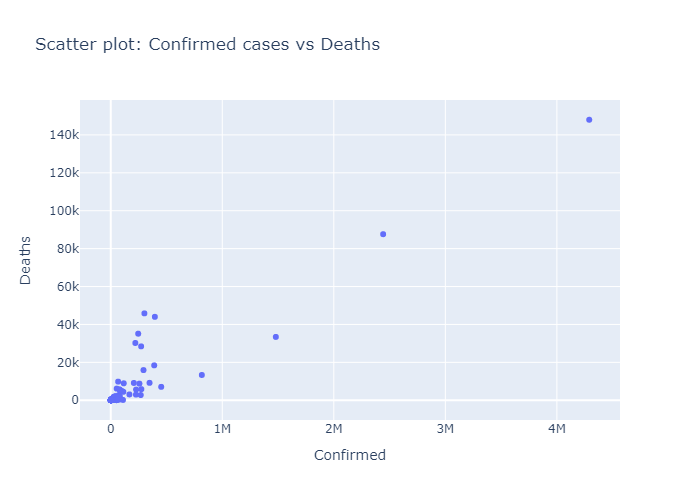

In [52]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               title='Scatter plot: Confirmed cases vs Deaths'
              )
fig.show()
pio.show(fig, renderer="png")

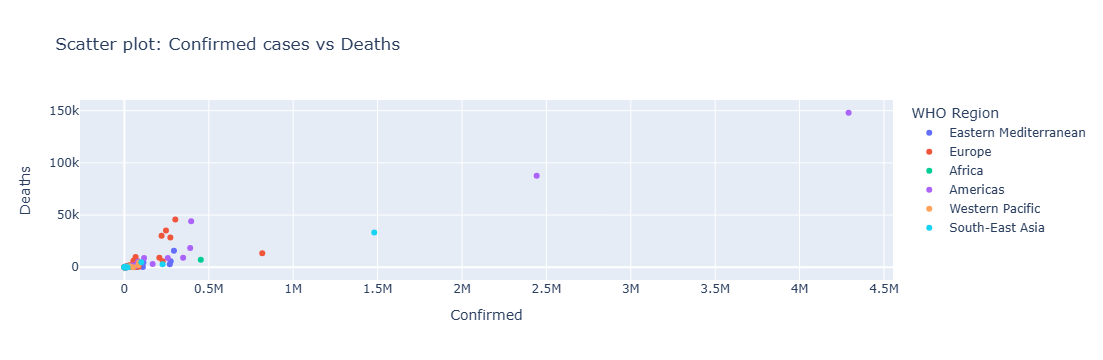

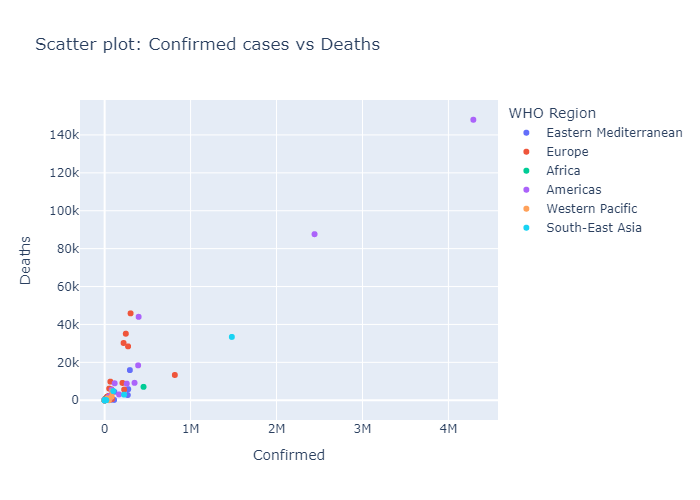

In [53]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               title='Scatter plot: Confirmed cases vs Deaths'
              )
fig.show()
pio.show(fig, renderer="png")

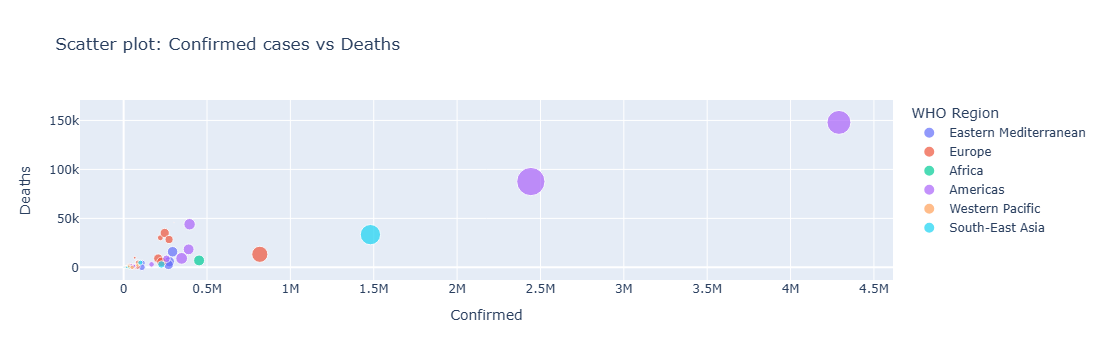

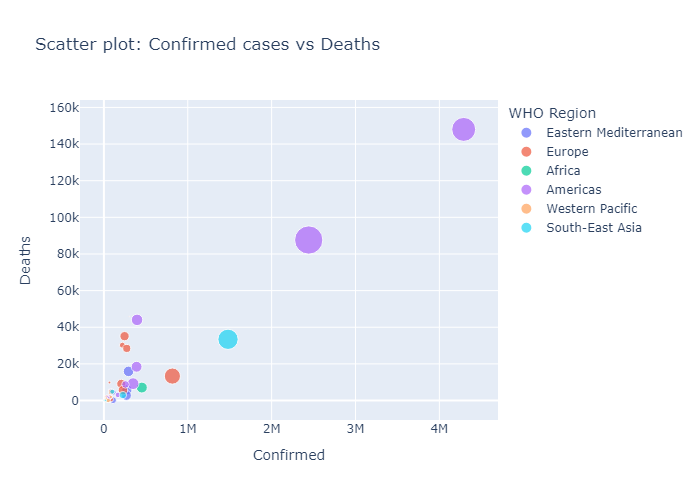

In [54]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Scatter plot: Confirmed cases vs Deaths'
              )
fig.show()
pio.show(fig, renderer="png")

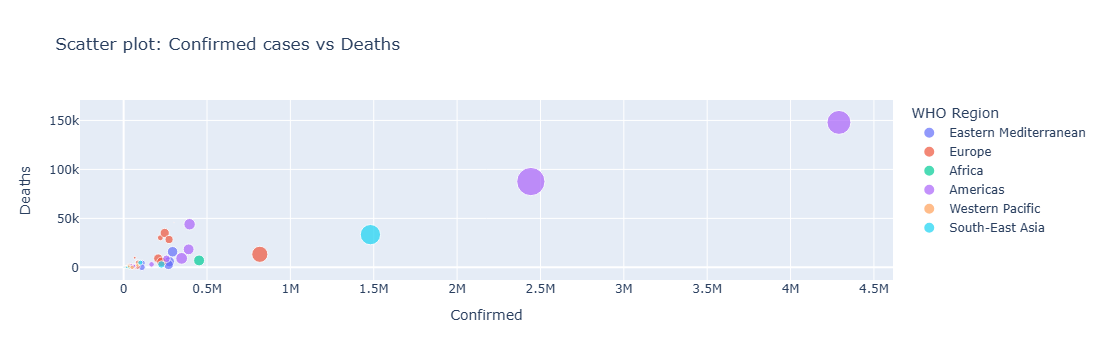

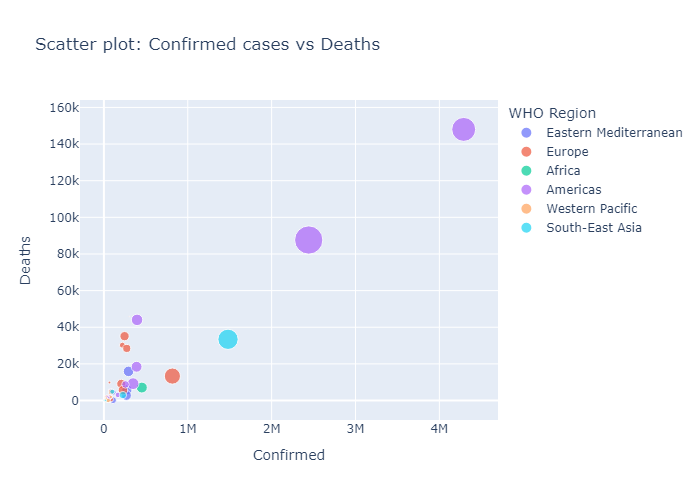

In [55]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Scatter plot: Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases']
              )
fig.show()
pio.show(fig, renderer="png")

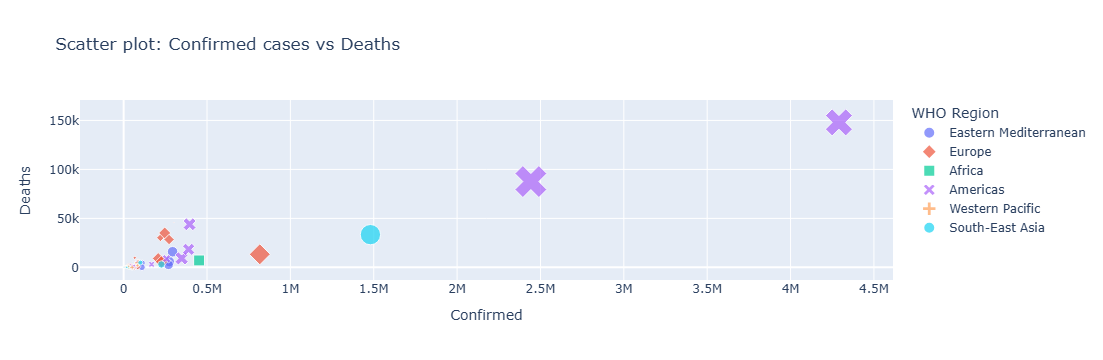

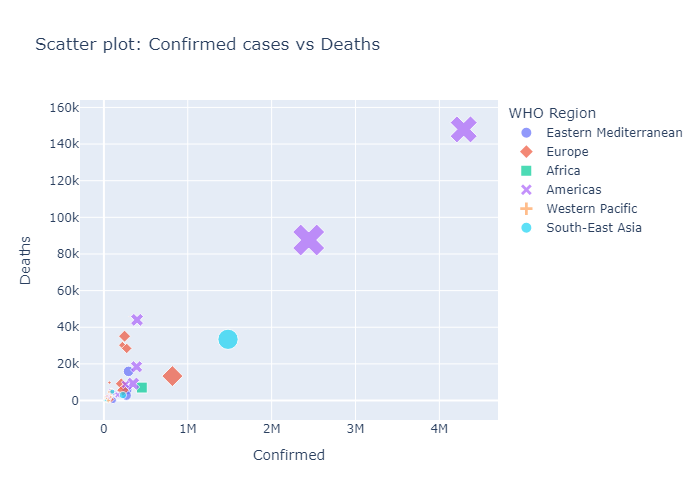

In [56]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Scatter plot: Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases'],
               symbol='WHO Region'
              )
fig.show()
pio.show(fig, renderer="png")

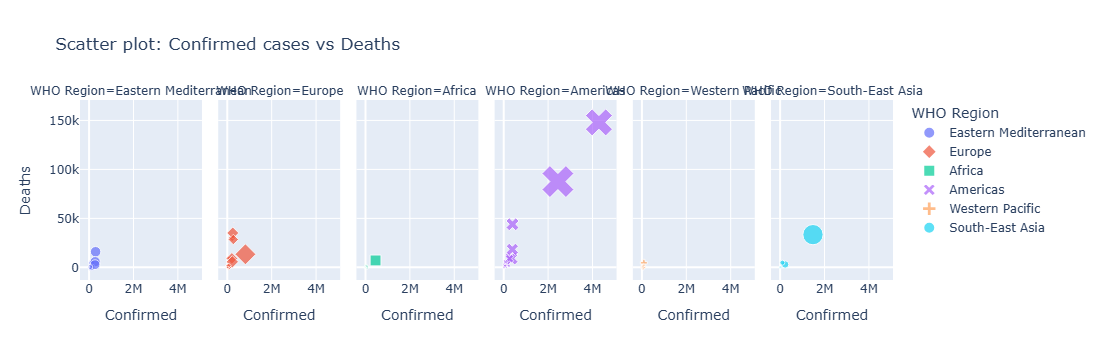

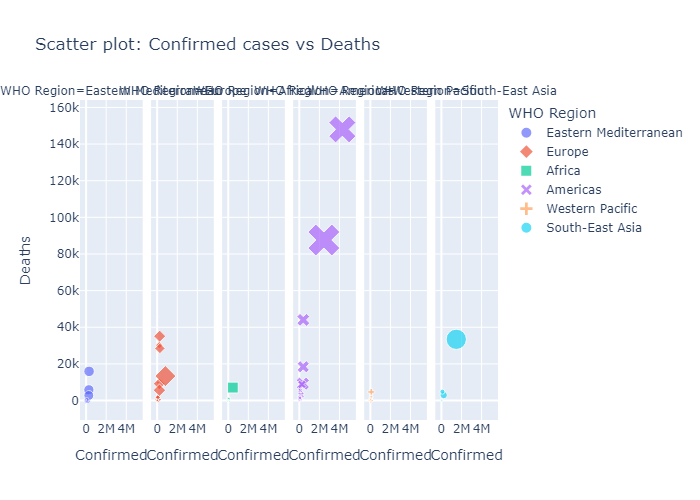

In [57]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Scatter plot: Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases'],
               symbol='WHO Region',
               facet_col='WHO Region'
              )
fig.show()
pio.show(fig, renderer="png")

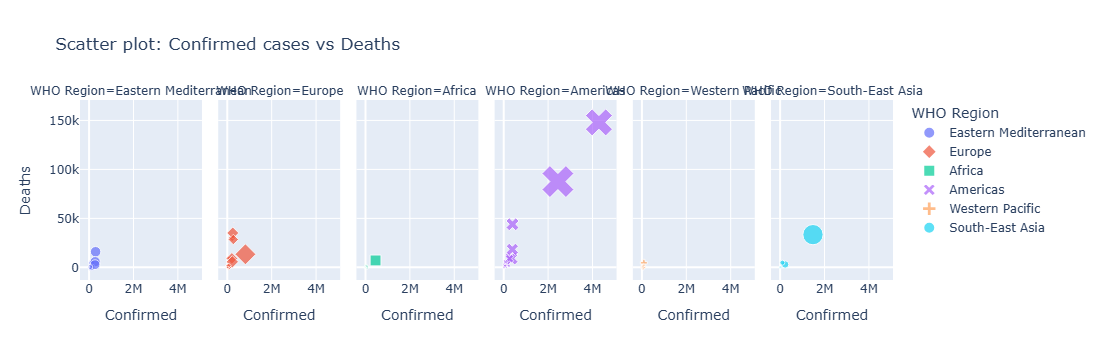

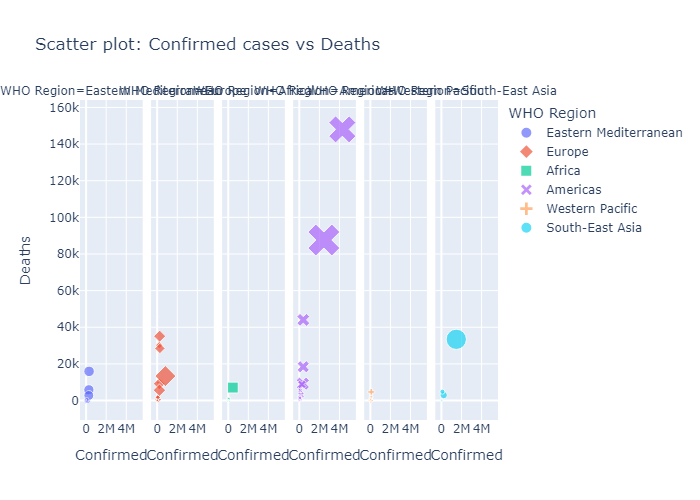

In [58]:
fig=px.scatter(data,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Scatter plot: Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases','Deaths / 100 Cases'],
               symbol='WHO Region',
               facet_col='WHO Region'
              )
fig.show()
pio.show(fig, renderer="png")